# Population Prediction

### Luis Garduno

## 1. Load Dataset

Dataset: [__International Database (IDB)__](https://www.census.gov/data-tools/demo/idb/#/country?COUNTRY_YEAR=2022&COUNTRY_YR_ANIM=2022)

Question Of Interest: Predict the population of earth in 2122.

In [1]:
import numpy as np
import pandas as pd

# Load dataset into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/luisegarduno/MachineLearning_Projects/master/data/idb5yr.all', delimiter='|', encoding='ISO-8859-1')
print("--> Columns:", df.columns.values)

--> Columns: ['#YR' 'TFR' 'SRB' 'RNI' 'POP95_99' 'POP90_94' 'POP85_89' 'POP80_84'
 'POP75_79' 'POP70_74' 'POP65_69' 'POP60_64' 'POP5_9' 'POP55_59'
 'POP50_54' 'POP45_49' 'POP40_44' 'POP35_39' 'POP30_34' 'POP25_29'
 'POP20_24' 'POP15_19' 'POP10_14' 'POP100_' 'POP0_4' 'POP' 'NMR' 'NAME'
 'MR1_4' 'MR0_4' 'MPOP95_99' 'MPOP90_94' 'MPOP85_89' 'MPOP80_84'
 'MPOP75_79' 'MPOP70_74' 'MPOP65_69' 'MPOP60_64' 'MPOP5_9' 'MPOP55_59'
 'MPOP50_54' 'MPOP45_49' 'MPOP40_44' 'MPOP35_39' 'MPOP30_34' 'MPOP25_29'
 'MPOP20_24' 'MPOP15_19' 'MPOP10_14' 'MPOP100_' 'MPOP0_4' 'MPOP' 'MMR1_4'
 'MMR0_4' 'IMR_M' 'IMR_F' 'IMR' 'GRR' 'GR' 'FPOP95_99' 'FPOP90_94'
 'FPOP85_89' 'FPOP80_84' 'FPOP75_79' 'FPOP70_74' 'FPOP65_69' 'FPOP60_64'
 'FPOP5_9' 'FPOP55_59' 'FPOP50_54' 'FPOP45_49' 'FPOP40_44' 'FPOP35_39'
 'FPOP30_34' 'FPOP25_29' 'FPOP20_24' 'FPOP15_19' 'FPOP10_14' 'FPOP100_'
 'FPOP0_4' 'FPOP' 'FMR1_4' 'FMR0_4' 'GENC' 'FIPS' 'E0_M' 'E0_F' 'E0' 'CDR'
 'CBR' 'ASFR45_49' 'ASFR40_44' 'ASFR35_39' 'ASFR30_34' 'ASFR25_29'
 'ASFR

-------------------------------------
  
## 2. Data Understanding

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Data Description

In [2]:
# Make year column easier to understand
df.rename(columns={'#YR':'YEAR'}, inplace=True)

# Remove every column except for year & population
for col in df.columns.values:
    if col != 'YEAR' and col != 'POP':
        df.drop(col, axis=1, inplace=True)

# Group by year & get sum
df_yr = df.groupby(by='YEAR')
df_yr = df_yr['POP'].sum()

# Create a new dataframe with new data (1951 - 2100)
pop_sum = []
for i in range(1951, 2022):
    pop_sum.append(df_yr[i])
df_pop = pd.DataFrame({'YEAR': list(range(1951, 2022)), 'POP': pop_sum})
df = df_pop

print(f'\n--> Current Population (2021): {df["POP"][70]:,d}\n')
df.tail(5)


--> Current Population (2021): 7,831,718,605



,YEAR,POP
66,2017,7516769535
67,2018,7597066210
68,2019,7676686052
69,2020,7756873419
70,2021,7831718605


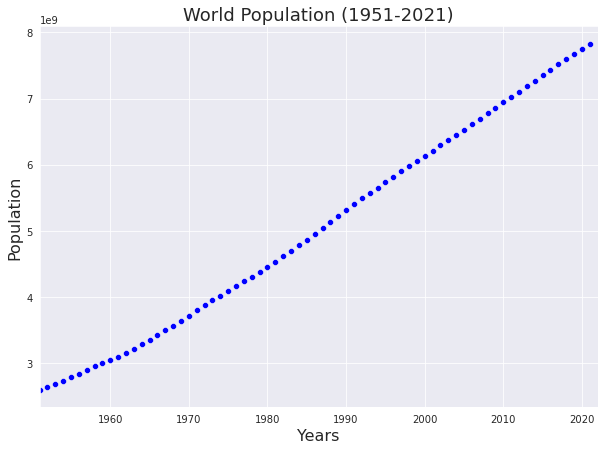

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
plt.subplots(figsize=(10,7))
ax = sns.scatterplot(data=df, x='YEAR', y='POP', color='blue')
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('Population', fontsize=16)
ax.set_title('World Population (1951-2021)', fontsize=18)
plt.xlim(1951, 2022)

plt.show()


---------------------

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2 Data Quality


----------------------

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3 Cleaning the Dataset

In [4]:
# Define X & Y
if 'POP' in df_pop:
    y = df_pop['POP'].values
    del df_pop['POP']
    X = df_pop.to_numpy()


----------------------


## 3. Modeling

Derived the formula for calculating the optimal values of the regression weights:

$$ w = (X^TX)^{-1}X^Ty $$

where $X$ is the matrix of values with a bias column of ones appended onto it.
For the population dataset one could construct this $X$ matrix by stacking a column of ones onto the `df_pop.YEAR` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$

In [5]:
# Create a matrix full of ones & stack 2 matrices horizontally
X = np.hstack((np.ones((len(X), 1)), X))

# Calculate optimal values of the regression weights
w = np.linalg.inv(X.T @ X) @ X.T @ y

print("\n++++++++++++++ WEIGHTS +++++++++++++++++\n" + "Shape:", w.shape, "\n", pd.DataFrame(data=w))
diff = np.round(( (y - (abs(np.dot(X,w) - y))) / y ) * 100, 2)
print("\n============= TARGET PERCENT ACCURACY ===============\n", pd.DataFrame(data=diff))


++++++++++++++ WEIGHTS +++++++++++++++++
Shape: (2,) 
               0
0 -1.492939e+11
1  7.770907e+07

============= TARGET PERCENT ACCURACY ===============
         0
0   89.27
1   90.80
2   92.16
3   93.38
4   94.44
..    ...
66  99.05
67  99.02
68  99.01
69  98.99
70  99.03

[71 rows x 1 columns]


In [6]:
print("Linear Equation:")
print("h =", w[0], "* x + (" + str(w[1]) + ")\n")

print(f'--> Population (2021): {y[70]:,d}\n')
print(f'--> ~Population (2021): {round(np.dot([1,2021], w)):,d}')
print(f'--> ~Population (2021): {round(np.dot([1,2021], w) + w[1]):,d}\n')
print(f'--> ~Population (2122): {round(np.dot([1,2122], w)):,d}')
print(f'--> ~Population (2122): {round(np.dot([1,2122], w) + w[1]):,d}')

Linear Equation:
h = -149293910653.26874 * x + (77709067.94568211)

--> Population (2021): 7,831,718,605

--> ~Population (2021): 7,756,115,665
--> ~Population (2021): 7,833,824,733

--> ~Population (2122): 15,604,731,527
--> ~Population (2122): 15,682,440,595



---------------------------

To predict the output from our model, $\hat{y}$, from $w$ and $X$ we need to use $\hat{y}=w^TX^T$, for row vector $\hat{y}$

In [7]:
yHat_np = w.T @ X.T        # Shape : (1,71)
yHat_np = yHat_np.ravel()  # Shape : (71,)

MSE_np = (np.square(y - yHat_np)).mean()
print(f'MSE: {round(MSE_np):,d}')

MSE: 7,655,001,063,865,541


In [8]:
X_new = np.array([[0], [2122]])
X_test = np.c_[np.ones((2, 1)), X_new]
y_test = X_test.dot(w)
y_test

array([-1.49293911e+11,  1.56047315e+10])


--> ~Population (2122): 15,604,731,527



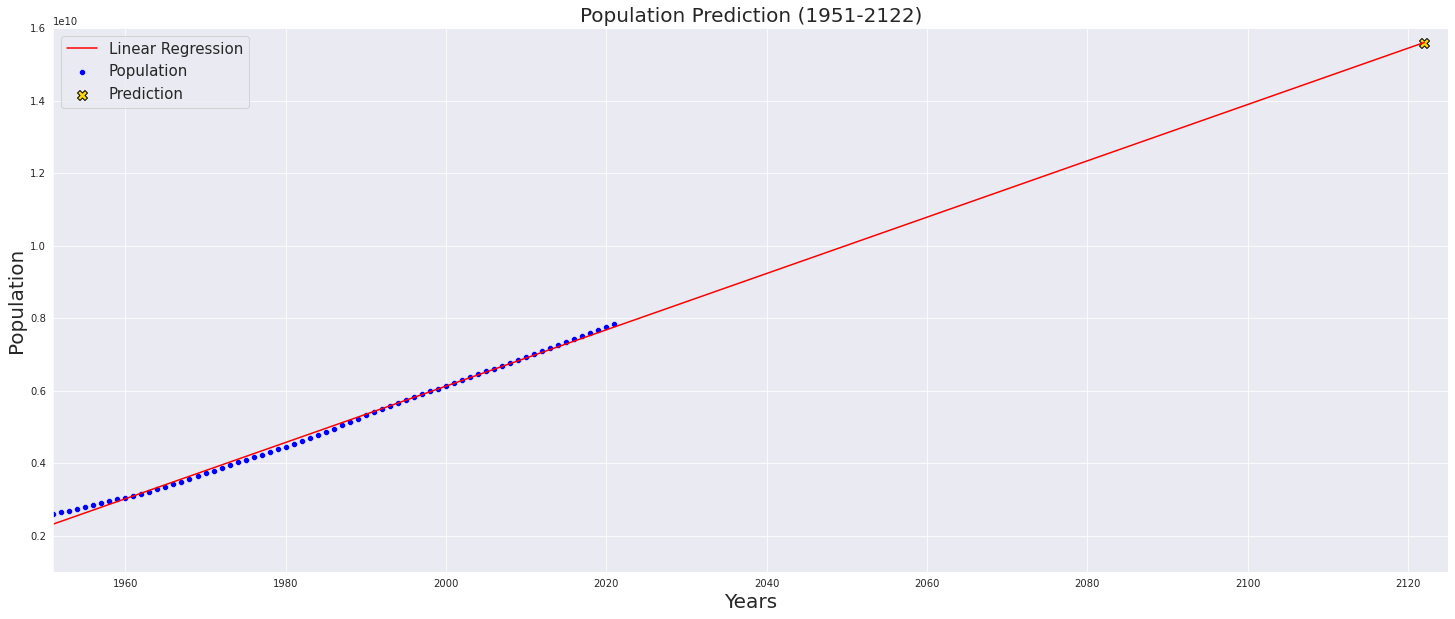

In [9]:
print(f'\n--> ~Population (2122): {round(y_test[1]):,d}\n')

sns.set_style("darkgrid")
plt.subplots(figsize=(25,10))

plt.plot(X_new, y_test, "r-", color='red')
sns.scatterplot(data=df, x='YEAR', y=y, color='blue')
sns.scatterplot(x=X_new[1], y=y_test[1], s=100, marker="X", linewidth=1, edgecolor='k', color='gold')


plt.xlabel('Years', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.title('Population Prediction (1951-2122)', fontsize=20)
plt.axis([1951, 2125, 1000000000, 16000000000])
plt.legend(["Linear Regression", "Population", "Prediction"], prop={'size': 15})
plt.show()


---------------------

#### References

Worldometer. World Population by Year. https://www.worldometers.info/world-population/world-population-by-year/ (Accessed 01-22-2022)